# This IPYNB file will help to analyse the data given in the json file.

File ensure that the json_path and yaml_path are filled in.
json_path = the results .json file deep within the AFC/results/dev/.../\*.json
yaml_path = the yaml file with all the 18 classifications

Note: Unable to debug the problem of moving the legends around. Hence, play around with `loc="center", bbox_to_anchor=(0.16,0.2),` within the legends method. Refer to [Stackoverflow](https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib) for more information.

In [12]:
import json
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import os
%matplotlib inline

json_path = r"C:\Users\chiny\OneDrive - Nanyang Technological University\Internships\AY23 DSO Summer\Classification of RF Project\AFC\results\dev\afc\202307\week_2\20230712_AFC_cnn_custom_10steps_v2\run_1_.json"
yaml_path = r"C:\Users\chiny\OneDrive - Nanyang Technological University\Internships\AY23 DSO Summer\Classification of RF Project\yolov5\data\rfclasses_new.yaml"
test_run = "v2"

# The path of the required folder
if not os.path.exists("analysed_results"):
    os.makedirs("analysed_results")
if not os.path.exists(f"analysed_results/{test_run}"):
    os.makedirs(f"analysed_results/{test_run}")



with open(yaml_path, "r") as r:
    data_yaml = yaml.safe_load(r)
    
with open(json_path, "r") as r:    
    data_dict = json.load(r)


nc = 18 # Number of classes
order = data_dict['config']['classes_order'][0]

data = np.zeros([nc+1, len(data_dict['results'])]) # nc + 1 as 1 is the total
    
for index, obj in enumerate(data_dict['results']):
    obj = obj['accuracy_per_class']
    for j, k in enumerate(obj):
        data[j,index] = obj[k]
    
    # print(index, obj)

data[data == 0] = np.nan
df = pd.DataFrame(data, 
                  index=['total']+[data_yaml['names'][k] for k in order], 
                  columns=["initial_10", "step_12", "step_14", "step_16", "step_18", ])
df.to_csv(f'analysed_results/{test_run}/AFC_results.csv')
df

,initial_10,step_12,step_14,step_16,step_18
total,0.733,0.733,0.667,0.614,0.593
WLAN_WAC_1,0.625,0.640,0.635,0.645,0.560
WLAN_WAC_7,0.745,0.760,0.740,0.720,0.600
WLAN_WN_0,0.735,0.720,0.705,0.695,0.575
WLAN_WN_1,0.800,0.805,0.675,0.575,0.570
WLAN_WBG_0,0.705,0.690,0.670,0.645,0.640
WLAN_WBG_1,0.805,0.790,0.455,0.290,0.300
WLAN_WBG_2,0.700,0.685,0.640,0.635,0.635
BT_classic_ADH5,0.670,0.650,0.655,0.650,0.670
BT_classic_AEDH5,0.650,0.625,0.640,0.645,0.625


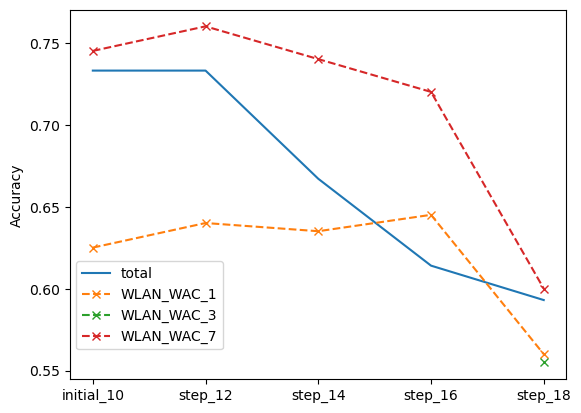

In [20]:
fig, ax = plt.subplots()

new_df = df.transpose()
variables = ['WLAN_WAC_1', 'WLAN_WAC_3', 'WLAN_WAC_7']

ax.plot(new_df.index, new_df['total'], label='total')

# Plotting the main variables of interest
for var in variables:
    ax.plot(new_df.index, new_df[var], label=var, linestyle="dashed", marker='x')

ax.set_ylabel("Accuracy")

fig.legend(loc="center", bbox_to_anchor=(0.16,0.2), bbox_transform=ax.transAxes)
# fig.set_size_inches(15,5)
plt.savefig(f'analysed_results/{test_run}/WAC.png')
plt.show()

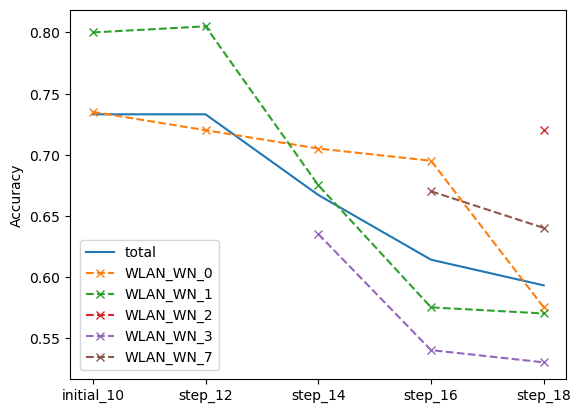

In [18]:
fig, ax = plt.subplots()

new_df = df.transpose()
variables = ['WLAN_WN_0', 'WLAN_WN_1', 'WLAN_WN_2', 'WLAN_WN_3', 'WLAN_WN_7']

ax.plot(new_df.index, new_df['total'], label='total')

# Plotting the main variables of interest
for var in variables:
    ax.plot(new_df.index, new_df[var], label=var, linestyle="dashed", marker='x')

ax.set_ylabel("Accuracy")

fig.legend(loc="center", bbox_to_anchor=(0.16,0.2), bbox_transform=ax.transAxes)
# fig.set_size_inches(15,5)
plt.savefig(f'analysed_results/{test_run}/WN.png')
plt.show()

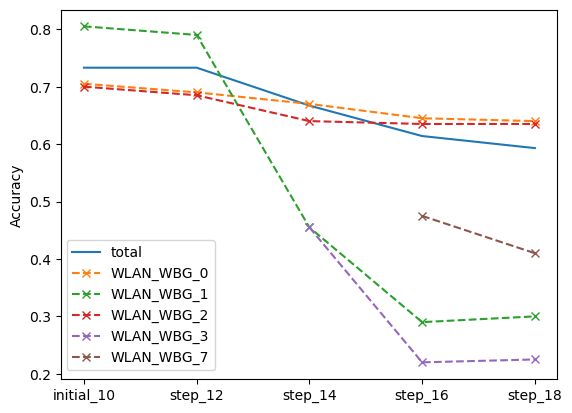

In [15]:
fig, ax = plt.subplots()

new_df = df.transpose()
variables = ['WLAN_WBG_0', 'WLAN_WBG_1', 'WLAN_WBG_2', 'WLAN_WBG_3', 'WLAN_WBG_7']

ax.plot(new_df.index, new_df['total'], label='total')

# Plotting the main variables of interest
for var in variables:
    ax.plot(new_df.index, new_df[var], label=var, linestyle="dashed", marker='x')

ax.set_ylabel("Accuracy")

fig.legend(loc="center", bbox_to_anchor=(0.16,0.2), bbox_transform=ax.transAxes)
# fig.set_size_inches(15,5)
plt.savefig(f'analysed_results/{test_run}/WBG.png')
plt.show()

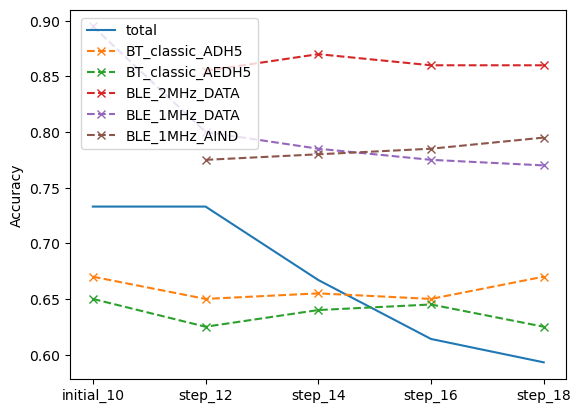

In [16]:
fig, ax = plt.subplots()

new_df = df.transpose()
variables = ['BT_classic_ADH5', 'BT_classic_AEDH5', 'BLE_2MHz_DATA', 'BLE_1MHz_DATA', 'BLE_1MHz_AIND']

ax.plot(new_df.index, new_df['total'], label='total')

# Plotting the main variables of interest
for var in variables:
    ax.plot(new_df.index, new_df[var], label=var, linestyle="dashed", marker='x')

ax.set_ylabel("Accuracy")

fig.legend(loc="center", bbox_to_anchor=(0.2,0.8), bbox_transform=ax.transAxes)
# fig.set_size_inches(15,5)
fig.savefig(f'analysed_results/{test_run}/BT.png')
plt.show()